# 5B: Perform

In this assignment, you will demonstrate your learning about creating data visualizations in Python using Seaborn. When you finish please go to Kernel --> Restart and Run All, and then double check that your notebook looks correct and all visualizations are visible before saving and submitting your .ipynb file (the notebook file) on gradescope.

We will work with the `university_data.csv` dataset imported into the `uni` DataFrame below. We then preview the first few rows. It contains information about 311 universities in the United States including average student test scores and gpa, tuition costs, the state in which the school is located, the ranking, etc.

**Note: There are no automated tests for this Perform because it is all about your skills at creating visualizations.**

In [2]:
# Run but do not modify this code
import seaborn as sns
import pandas as pd
sns.set_theme()
uni = pd.read_csv("university_data.csv")
print(uni.shape)
uni.head()

(311, 13)


,act_avg,sat_avg,enrollment,city,acceptance_rate,percent_receiving_aid,cost_after_aid,state,hs_gpa_avg,tuition,Institution_name,institution_type,us_rank
0,32.0,1400.0,5400.0,Princeton,7.0,60.0,16793.0,NJ,3.9,47140,Princeton University,private,1.0
1,32.0,1430.0,6710.0,Cambridge,5.0,55.0,16338.0,MA,4.0,48949,Harvard University,private,2.0
2,32.0,1450.0,5941.0,Chicago,8.0,42.0,27767.0,IL,4.0,54825,University of Chicago,private,3.0
3,32.0,1420.0,5472.0,New Haven,6.0,50.0,18385.0,CT,NaN,51400,Yale University,private,3.0
4,32.0,1430.0,6113.0,New York,6.0,48.0,21041.0,NY,NaN,57208,Columbia University,private,5.0


### Question 1
1. Generate a scatterplot of `tuition` on the horizontal `x` axis and `sat_avg` on the vertical `y` axis.
2. Generate the same scatterplot as in step 1, but color the points according to `institution_type`.
3. Briefly interpret the visualizations you created in steps 1 and 2. What does it show about the correlation between `tuition` and `sat_avg`? About the difference between `public` and `private` institutions? Put your answer in "Answer 1" cell.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q1
manual: true
points: 12
-->

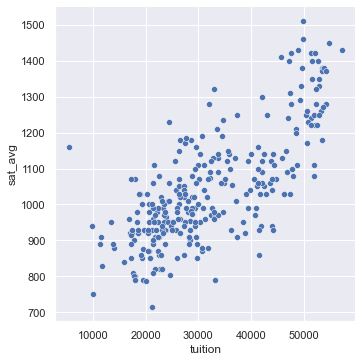

In [3]:
# Put your code for question 1.1 here
sns.relplot(x="tuition", y="sat_avg", data = uni)

<!-- END QUESTION -->

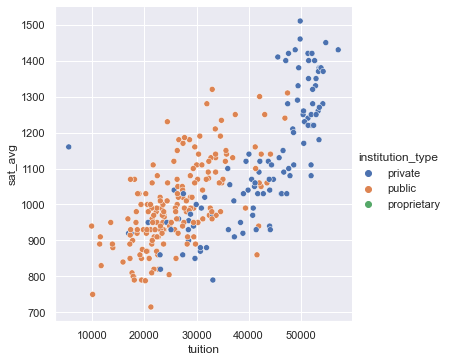

In [4]:
# Put your code for question 1.2 here
sns.relplot(x="tuition", y="sat_avg", data = uni, hue="institution_type")

### Answer 1

There is a positive correlation between the average SAT score and the tuition the university makes students pay. By this I mean that the higher the SAT score, the higher the tuition usually. This makes sense because usually students with higher SAT scores will go to more "prestigious" universities that often have higher tuition. 

As far as public versus private schools, there are two comparisons to be made. Usually students with higher SAT scores go to private universities because these are usually more academically competitive schools. And because they go to these private schools, they pay higher tuition as well. Overall private schools cost more and have higher sat scores.

### Question 2.1

Below, we plot a histogram of `hs_gpa_avg`, the average high school gpa, for the schools. We set the `bins` manually. Identify at least two problems with our setting of `bins` that make the histogram difficult to read and or misleading. You do not need to replot the histogram to answer this question, but you are welcome to modify the `bins` parameter to see what different settings would give you in the visualization. Put your answer in "Answer 2.1" cell.

3.2
3.25
3.3000000000000003
3.35
3.4000000000000004
3.45
3.5
3.5500000000000003
3.6
3.6500000000000004
20    3.7
21    3.9
22    3.9
23    3.7
24    3.8
25    4.0
26    NaN
27    3.8
28    NaN
29    3.6
Name: hs_gpa_avg, dtype: float64


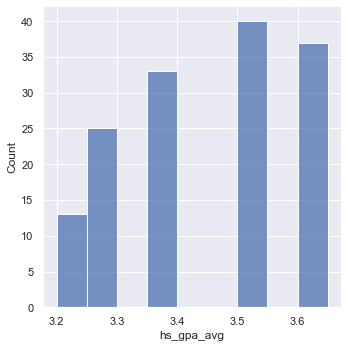

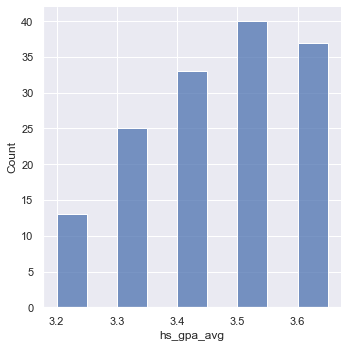

In [13]:
# Run this code, can modify to experiment but not required, answer below
sns.displot(data=uni, x="hs_gpa_avg", bins=[3.2 + 0.05*i for i in range(10)])
sns.displot(data=uni, x="hs_gpa_avg", bins=[3.2,3.25, 3.3, 3.35, 3.4, 3.45,3.5, 3.55, 3.6, 3.65])

#Problem 1 Proof
for i in range(10):
    print(3.2+0.05*i)

#Problem 2 Proof
print(uni[20:30]["hs_gpa_avg"])

### Answer 2.1
1) The first problem is that the range of values for the hs_gpa_avg isn't large enough. It only goes up to 3.65 due to the for loop, when there are a significant amount of GPAs above 3.65 and below 3.2. 

2) The second problem with the bins is that the GPA averages of the universities aren't measured to the hundredths place. This makes gaps when the value of the GPA is only to the tenths place. Because none of them are 3.35, they are either 3.3 or 3.4. The code adds 0.05 even though the GPA's cant have that value.

3)The third problem with the bins is the fact that the for loop doesn't function properly. The purpose is to start at 3.2 and get every 0.05 value. This will result in the second graph above. However, some of the numbers give bins that are decimals off. For example, when i = 3, the bin is 3.3000000000000003. This results in an error with the bins so they are not evenly distributed.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_1
manual: true
points: 4
-->

<!-- END QUESTION -->



### Question 2.2

Below we plot a heat map that visualizes the relationship between `hs_gpa_avg` on the horizontal `x` axis and `sat_avg` on the vertical `y` axis. It looks like there is a strong relationship between `hs_gpa_avg` and `sat_avg`. Suppose someone interprets this plot by saying "Look, every student who has a good high school gpa of 3.75 or above gets a SAT score of at least 900 or so." Why is this not necessarily true? Put your answer in "Answer 2.2" cell.

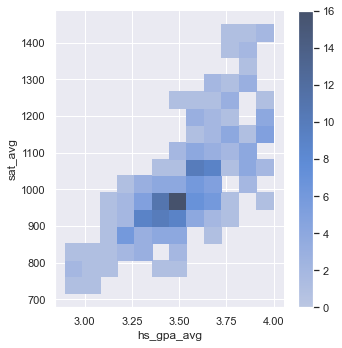

In [6]:
# Run this code, can modify to experiment but not required, answer below
sns.displot(data=uni, x="hs_gpa_avg", y="sat_avg", cbar=True)

### Answer 2.2
This is not necessarily true because a heat map models correlation between two variables. The data set comes from university averages of their students not from individual student statistics. This means the average GPA from high school of 3.75 does usually score above 900. However, this is the average and not the individual student score. And the darker color of blue models a stronger correlation between the GPA and SAT. For example, a university having a 3.5 GPA average has a strong correlation with them getting between a 900 and 1000 as their SAT average. This is different that saying every student who has a GPA of 3.75 gets an SAT score of at least 900. This just means the correlation between having lower than a 900 SAT score and a 3.75 GPA average is low. 

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q2_2
manual: true
points: 4
-->

<!-- END QUESTION -->



### Question 3
1. Generate a bar plot showing the difference in the distribution of `hs_gpa_avg` between `public` and `private` schools. That is, there should be two bars showing the average values of `hs_gpa_avg` for `public` vs. `private` schools. There are a small number of `proprietary` schools in the dataset which are missing data in this category; filter those out so they do not appear in this visualization.
2. Visualize the same information as in step 1, but using a box plot to visualize the distributions. As in step 1, do not include `proprietary` schools in the visualization. Briefly interpret your results, especialy explaining what information the box plot visaulizes that was not clear in the earlier bar plot. Explain in "Answer 3" cell.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q3
manual: true
points: 12
-->

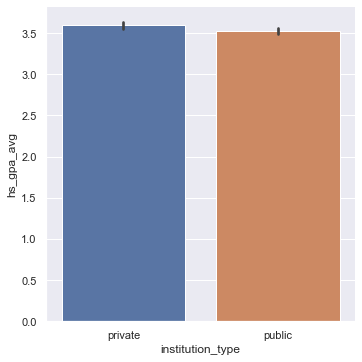

In [7]:
# Put your code for 3.1 here
ins_type=["public", "private"]
uninew= uni.copy()
uninew = uninew[uninew["institution_type"] != "proprietary"]
sns.catplot(x="institution_type", y= "hs_gpa_avg", data=uninew, kind ="bar")

<!-- END QUESTION -->

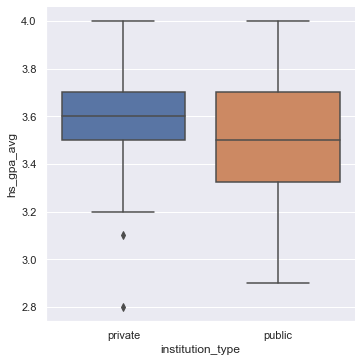

In [8]:
# Put your code for 3.2 here
uninew2= uni.copy()
uninew2 = uninew2[uninew2["institution_type"] != "proprietary"]
sns.catplot(x="institution_type", y= "hs_gpa_avg", data=uninew, kind ="box")

### Answer 3
Private schools have a higher average GPA than public schools as shown by the first graph. The two graphs compare high school average GPA with the type of institution. The box plot gives more information that just the averages. The middle line in each of the boxes gives the median value which shows the the private institutions' has a higher median GPA. However, the more interesting information comes from the zero percentile which is the lower line extending from the box. This shows that the probability of a student scoring below a 3.2 for private is very low and for public, this line extends down to under 3.0. This shows the bottom percentile of students scores for both are different which was not shown by simply comparing the averages. Box plot gives more accurate distribution of the gpas. So private generally has higher gpa and less variance. Outliers bring average down for private.

### Question 4
1. Generate a line plot of `us_rank` on the horizontal `x` axis and `tuition` on the vertical `y` axis. 
2. In a single figure, plot the same line as in step 2 in one color and another line for `cost_after_aid` on the vertical `y` axis in a different color. Use the same `us_rank` ordering on the horizontal `x` axis for both. Note that you may need to wrangle your data somewhat to produce this on the same plot rather than directly using the `uni` dataframe.
3. In step 2 we plotted `tuition` and `cost_after_aid` on the same vertical `y` axis. Briefly explain why that was reasonable, but it would not make sense to plot `tuition` and `enrollment` on the same vertical `y` axis in the same way. Explain in "Answer 4" cell.

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q4
manual: true
points: 12
-->

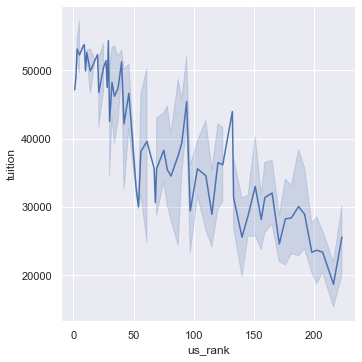

In [9]:
# Put your code for 4.1 here
sns.relplot(x="us_rank",y="tuition", data=uni, kind="line")

<!-- END QUESTION -->

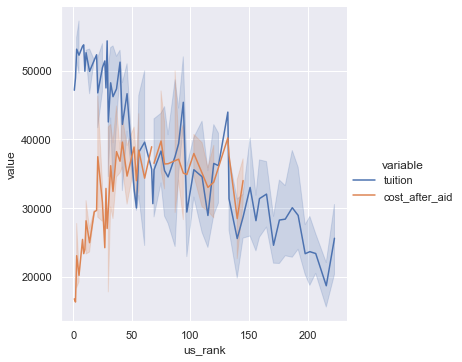

In [10]:
# Put your code for 4.2 here
import matplotlib.pyplot as plt
uninew3=uni.copy()
uninew3= pd.melt(uninew3, id_vars=['us_rank'], value_vars=['tuition', 'cost_after_aid'])

sns.relplot(x="us_rank", y= 'value', hue="variable", data = uninew3, kind="line")

### Answer 4
This is reasonable in multiple ways. First is that cost after aid and tuition both deal with monetary values. On the otherhand employment is numbers of people, so it wouldn't make sense to compare these two. Also, tuition and cost after aid have a similar range of values, which means the graph can show more information when plotted.

### Question 5
Inside of the homework folder we include an image `state_enrollments_fig.png` that visualizes the total enrollment of all of the universities in the `uni` dataset grouped by state. It is a horizontal bar plot that is sorted by the values from greatest to least. It was generated by manipulating the `uni` dataset with Pandas and then plotting with Seaborn.

Create a similar visualization, except instead of just visualizing total enrollment by state, visualize total enrollment per capita by state. That is, for each state, calculate the total enrollment in that state across all universities in the `uni` dataset, and then divide by that state's population. You can find the state populations as of the 2010 census in the `state_pops.csv` dataset, which uses the same two letter abbreviations for state names as the `uni` dataset.

Some tips on making your plot look like `state_enrollments_fig.png`:
- To prevent the image being "squashed" vertically, set the `height` parameter of the Seaborn plot call to `10`. 
- To simplify the colors to be gray rather than a rainbow, set the `color` parameter to `"gray"`.
- To make the bar plot horizontal, use the numerical variable (in this case enrollment per capita) for the horizontal `x` axis in Seaborn and the categorical variable (in this case the state name) for the vertical `y` axis.
- To sort the bars, you can either [sort the dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) according to the appropriate values before plotting or you can compute the ordering and then pass it to [the Seaborn order parameter](https://seaborn.pydata.org/generated/seaborn.catplot.html).

<!-- BEGIN QUESTION -->

<!--
BEGIN QUESTION
name: q5
manual: true
points: 4
-->

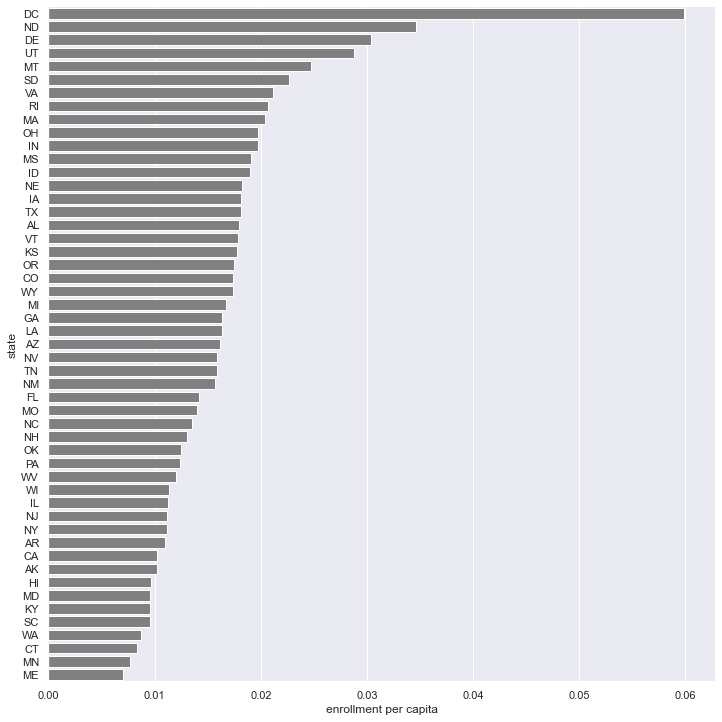

In [11]:
# Put your code here for problem 5
# Feel free to add additional cells

pops = pd.read_csv("state_pops.csv")
uninew4 = uni.copy()
uninew41= uninew4.groupby('state')['enrollment'].sum()
popsnew = pops.groupby('state')['population_2010'].sum()
dfd = uninew41.div(popsnew.values)
data = {'state':dfd.index,
        'enrollment per capita':dfd.values}

df = pd.DataFrame(data)
df2= df.sort_values(by='enrollment per capita', ascending = False)

sns.catplot(y="state", x="enrollment per capita", data = df2, kind="bar", color= "gray", height =10)

<!-- END QUESTION -->

When you finish remember to go to Kernel --> Restart and Run All, and then double check that your notebook looks correct and all visualizations are visible before saving and submitting your .ipynb file (the notebook file) on gradescope.